<a href="https://colab.research.google.com/github/neelpanchal11/Binomial-Asset-Pricing-Model-/blob/main/Binomial_Asset_Pricing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binomial Asset Pricing Model - Choosing Parameters**

In [1]:
import numpy as np

Binomial Tree Representation.

For this study, we will price a European Call.

In [2]:
# Initialise parameters
S0 = 100      # initial stock price
K = 110       # strike price
T = 0.5       # time to maturity in years
r = 0.06      # annual risk-free rate
N = 100       # number of time steps
sigma = 0.3   # Annualised stock price volatility
opttype = 'C' # Option Type 'C' or 'P'


## **Cox, Ross, and Rubinstein (CRR) Method**

Here, we choose equal jump sizes.

In [3]:
def CRR_method(K,T,S0,r,N,sigma,opttype='C'):
    #precomute constants
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    q = (np.exp(r*dt) - d) / (u-d)
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j]-K)
        else:
            C[j] = max(0, K - S[j])

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )

    return C[0]

CRR_method(K,T,S0,r,N,sigma,opttype='C')

5.77342630682585

## **Jarrow and Rudd (JR) Method**

Here, we choose equal risk-neutral probabilities.

In [4]:
def JR_method(K,T,S0,r,N,sigma,opttype='C'):
    #precomute constants
    dt = T/N
    nu = r - 0.5*sigma**2
    u = np.exp(nu*dt + sigma*np.sqrt(dt))
    d = np.exp(nu*dt - sigma*np.sqrt(dt))
    q = 0.5
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j]-K)
        else:
            C[j] = max(0, K - S[j])

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )

    return C[0]

JR_method(K,T,S0,r,N,sigma,opttype='C')

5.754089414567556

## **Equal Probabilities (EQP) Method**

Here, we choose equal risk-neutral probabilities under the logarithmic asset pricing tree.

In [5]:
def EQP_method(K,T,S0,r,N,sigma,opttype='C'):
    #precomute constants
    dt = T/N
    nu = r - 0.5*sigma**2
    dxu = 0.5*nu*dt + 0.5*np.sqrt(4*sigma**2 * dt - 3*nu**2 * dt**2)
    dxd = 1.5*nu*dt - 0.5*np.sqrt(4*sigma**2 * dt - 3*nu**2 * dt**2)
    pu = 0.5
    pd = 1-pu
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*np.exp(N*dxd)
    for j in range(1,N+1):
        S[j] = S[j-1]*np.exp(dxu - dxd)

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j]-K)
        else:
            C[j] = max(0, K - S[j])

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( pu*C[j+1] + pd*C[j] )

    return C[0]

EQP_method(K,T,S0,r,N,sigma,opttype='C')

5.7365844788666545

## **Trigeorgis (TRG) Method**

Here, we choose equal jump sizes under the logarithmic asset pricing tree.

In [6]:
def TRG_method(K,T,S0,r,N,sigma,opttype='C'):
    #precomute constants
    dt = T/N
    nu = r - 0.5*sigma**2
    dxu = np.sqrt(sigma**2 * dt + nu**2 * dt**2)
    dxd = -dxu
    pu = 0.5 + 0.5*nu*dt/dxu
    pd = 1-pu
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*np.exp(N*dxd)
    for j in range(1,N+1):
        S[j] = S[j-1]*np.exp(dxu - dxd)

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j]-K)
        else:
            C[j] = max(0, K - S[j])

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( pu*C[j+1] + pd*C[j] )

    return C[0]

TRG_method(K,T,S0,r,N,sigma,opttype='C')

5.773359020180677

## **Comparison of Methods**
Now, we will compare convergence as a function of time steps.

In [7]:
!pip install py_vollib

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 5.2 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62832 sha256=1e06dc0e8851af80c31677408bf85f3b3b58cc8430e99b4e64a3abd20f53934f
  Stored in directory: /root/.cache/pip/wheels/84/0c/fc/b68506eda40cccaeb0013be550ba904d253ec90eae2b156052
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24450 sha256=9e86a2a2e65eb5e4632436afc54981276b0d0b7152d3f08a4cd456f2adba2a6f
  Stored in directory: /root/.cache/pip/wheels/32/d9/4f/360d4b0b9ec7c65583ec7c8e72fd2158c97ad04fbcb932891c
Successfully built py_vollib py_lets_be_rational


In [8]:
from py_vollib.black_scholes import black_scholes as bs
import matplotlib.pyplot as plt

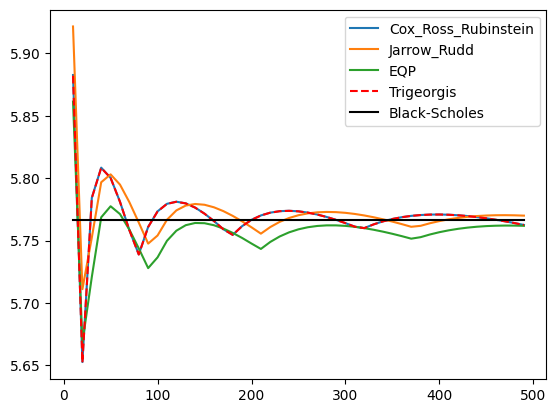

In [9]:
## call option with different steps
CRR, JR, EQP, TRG = [],[],[],[]

periods = range(10,500,10)
for N in periods:
    CRR.append(CRR_method(K,T,S0,r,N,sigma,opttype='C'))
    JR.append(JR_method(K,T,S0,r,N,sigma,opttype='C'))
    EQP.append(EQP_method(K,T,S0,r,N,sigma,opttype='C'))
    TRG.append(TRG_method(K,T,S0,r,N,sigma,opttype='C'))

BS = [bs('c', S0, K, T, r, sigma) for i in periods]

plt.plot(periods, CRR, label='Cox_Ross_Rubinstein')
plt.plot(periods, JR, label='Jarrow_Rudd')
plt.plot(periods, EQP, label='EQP')
plt.plot(periods, TRG, 'r--',label='Trigeorgis')
plt.plot(periods, BS, 'k',label='Black-Scholes')
plt.legend(loc='upper right')
plt.show()